**Milestone 2 (Week 3–4)**
**Feature Engineering & Baseline Energy Prediction**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


**Load Cleaned Dataset (From Milestone 1)**

In [3]:
df = pd.read_csv(
    "/content/drive/MyDrive/cleaned_energy_data_milestone1.csv"
)

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_scaled
timestamp,,,,,,,,
2006-12-16 17:00:00,3.358056,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,0.972820
2006-12-16 18:00:00,3.055400,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,0.881363
2006-12-16 19:00:00,3.371600,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,0.976913
2006-12-16 20:00:00,3.266533,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,0.945164
2006-12-16 21:00:00,3.050367,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,0.879842


Feature Engineering (Module 3)

>✅ Time-Based Features

In [4]:
df['hour'] = df.index.hour
df['day'] = df.index.day
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month

**Lag Features (Time Series)**

In [5]:
df['lag_1'] = df['Global_active_power'].shift(1)
df['lag_2'] = df['Global_active_power'].shift(2)
df['lag_3'] = df['Global_active_power'].shift(3)


**Rolling Statistics**

In [6]:
df['rolling_mean_3'] = df['Global_active_power'].rolling(window=3).mean()
df['rolling_std_3'] = df['Global_active_power'].rolling(window=3).std()


**Drop NaN Rows (created by lag & rolling)**

In [7]:
df = df.dropna()

**Final Feature Set**

In [8]:
features = [
    'hour', 'day', 'dayofweek', 'month',
    'lag_1', 'lag_2', 'lag_3',
    'rolling_mean_3', 'rolling_std_3'
]

X = df[features]
y = df['Global_active_power']


**Train-Test-Split(Time Series Safe)**

In [9]:
split_index = int(len(df) * 0.8)

X_train = X.iloc[:split_index]
X_test  = X.iloc[split_index:]

y_train = y.iloc[:split_index]
y_test  = y.iloc[split_index:]


**BaseLine Model(Linear Regression)**

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

**Predictions**

In [11]:
y_pred = model.predict(X_test)

**Model Evaluation (MAE & RMSE)**

In [12]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)


Mean Absolute Error (MAE): 1.1374765036260894e-14
Root Mean Square Error (RMSE): 1.3052186916613759e-14


**Actual vs Predicted Plot**

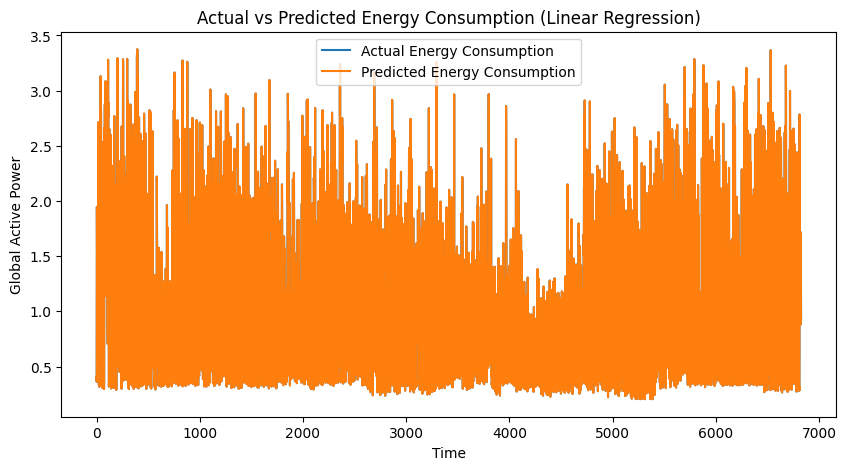

In [13]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label='Actual Energy Consumption')
plt.plot(y_pred, label='Predicted Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Global Active Power')
plt.title('Actual vs Predicted Energy Consumption (Linear Regression)')
plt.legend()
plt.show()